# **Vanilla GAN - GENERATIVE ADVERSARIAL NETWORKS**

* GAN 모델의 이해
* 생성자 모델과 판별자 모델의 연결 방법

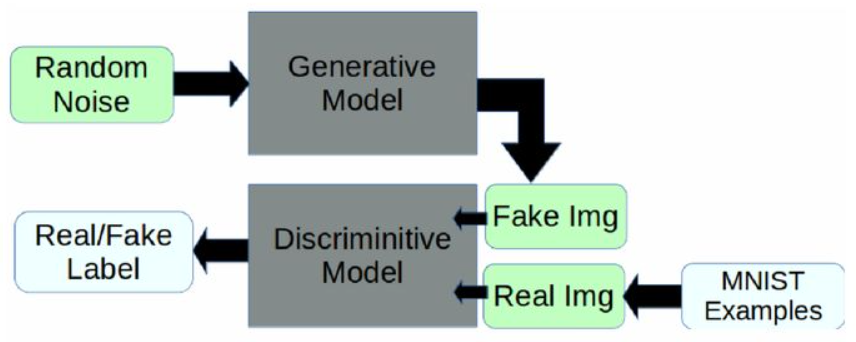

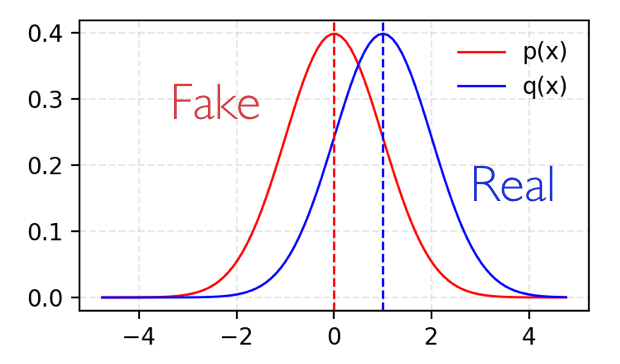

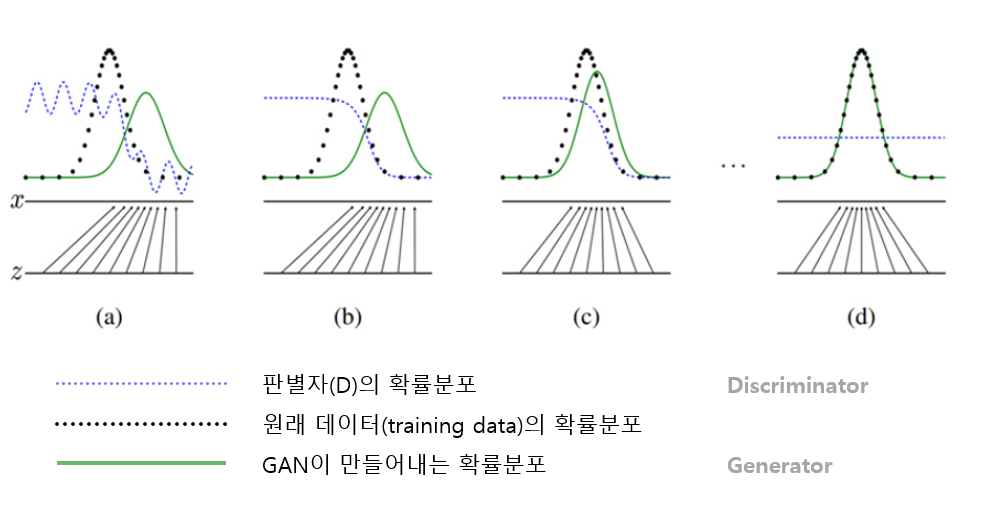

* BatchNormalization: 입력데이터의 평균이 0 분산이 1이 되도록 재배치하는 것

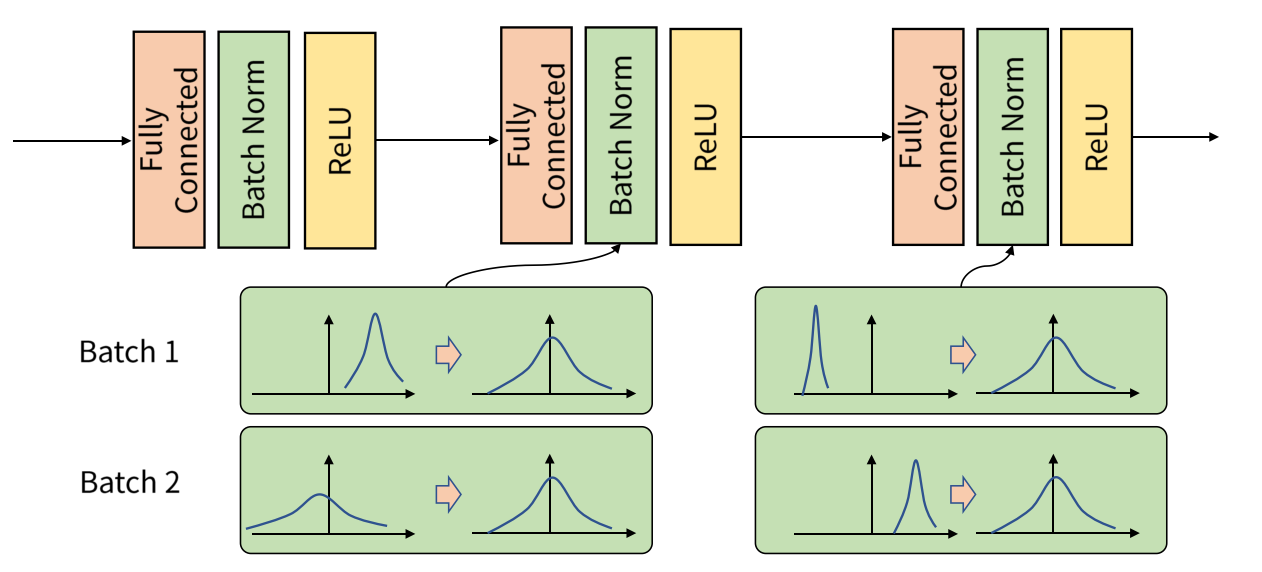

**배치정규화의 잘 알려진 장점**
* 빠른 학습속도
* 가중치 초기화애 대한 민감도를 감소
* 표준화를 대체
* 기울기 소실 문제(Gradient 폭발 및 소멸 문제) 해결 



#### 1. **라이브러리 준비**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
import tensorflow as keras
from tensorflow.keras import initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

#### 2. **데이터 로드**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


#### Reshape과 정규화

In [4]:
print('X_train.shape', X_train.shape)
X_train = X_train.reshape(60000, 28*28)
X_train = (X_train.astype('float32') - 127.5) / 127.5
print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [5]:
X_train[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

### **3. 모델 정의**
#### 생성자(Generator) 모델

In [6]:
latent_dim = 100

generator = Sequential()
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=initializers.RandomNormal(stddev=0.02), activation='relu'))
generator.add(BatchNormalization())
generator.add(Dense(256, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dense(512, activation='relu'))
generator.add(BatchNormalization())
generator.add(Dense(784, activation='tanh')) # 하이퍼볼릭 탄젠트: 탄에이치

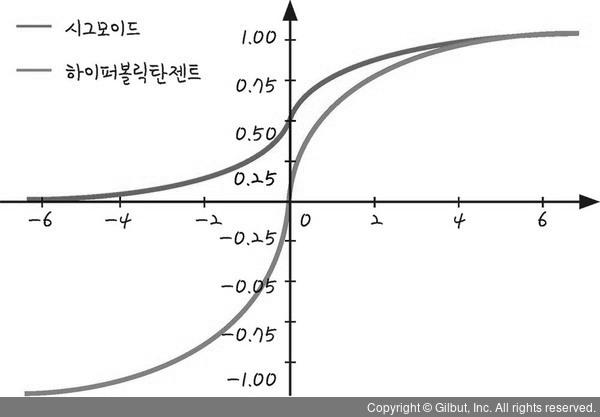

In [7]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2

#### 판별자(Discriminator) 모델

In [8]:
discriminator = Sequential()

discriminator.add(Dense(128, input_shape=(784,), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(Dense(256, activation='relu'))
discriminator.add(Dense(512, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

In [9]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 265,601
Trainable params: 265,601
Non-trainable params: 0
_________________________________________________________________


### **3. 컴파일 모델**

#### Compile discriminator

In [10]:
discriminator.compile(optimizer=Adam(lr=0.0002), loss='binary_crossentropy', metrics=['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Combined network

In [11]:
discriminator.trainable = False

g_input = Input(shape=(100,))
dis_output = discriminator(generator(g_input))

gan = Model(g_input, dis_output)
gan.compile(optimizer=Adam(lr=0.0002), loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


### **4. 학습**

In [13]:
epochs = 100
batch_size = 64

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

epoch = 1/100, d_loss=0.020, g_loss=6.060
1/1 [==============================] - 0s 93ms/step


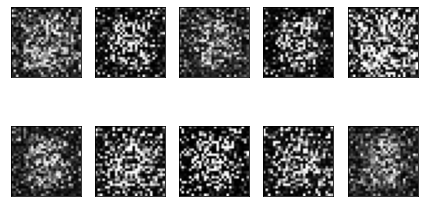

epoch = 2/100, d_loss=0.131, g_loss=4.858
epoch = 3/100, d_loss=0.284, g_loss=3.778
epoch = 4/100, d_loss=0.640, g_loss=1.835
epoch = 5/100, d_loss=0.586, g_loss=1.581
epoch = 6/100, d_loss=0.440, g_loss=2.083
1/1 [==============================] - 0s 15ms/step


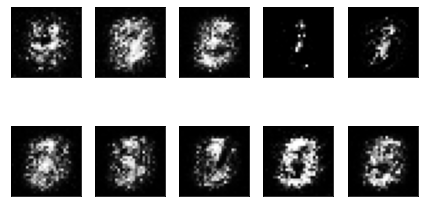

epoch = 7/100, d_loss=0.640, g_loss=1.659
epoch = 8/100, d_loss=0.417, g_loss=1.754
epoch = 9/100, d_loss=0.553, g_loss=1.482
epoch = 10/100, d_loss=0.919, g_loss=1.297
epoch = 11/100, d_loss=0.601, g_loss=1.215
1/1 [==============================] - 0s 14ms/step


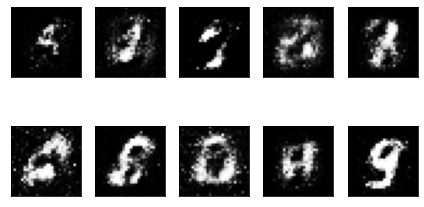

epoch = 12/100, d_loss=0.518, g_loss=1.327
epoch = 13/100, d_loss=0.509, g_loss=1.319
epoch = 14/100, d_loss=0.431, g_loss=1.442
epoch = 15/100, d_loss=0.584, g_loss=1.289
epoch = 16/100, d_loss=0.459, g_loss=1.682
1/1 [==============================] - 0s 17ms/step


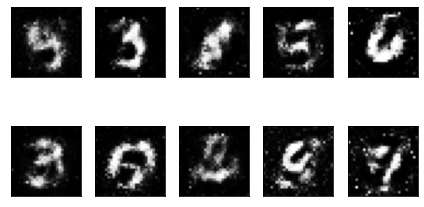

epoch = 17/100, d_loss=0.432, g_loss=1.762
epoch = 18/100, d_loss=0.500, g_loss=1.617
epoch = 19/100, d_loss=0.536, g_loss=1.389
epoch = 20/100, d_loss=0.555, g_loss=1.389
epoch = 21/100, d_loss=0.516, g_loss=1.387
1/1 [==============================] - 0s 14ms/step


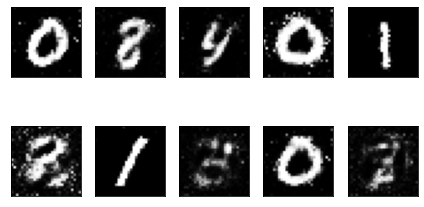

epoch = 22/100, d_loss=0.486, g_loss=1.184
epoch = 23/100, d_loss=0.467, g_loss=1.382
epoch = 24/100, d_loss=0.747, g_loss=0.880
epoch = 25/100, d_loss=0.481, g_loss=1.259
epoch = 26/100, d_loss=0.521, g_loss=1.403
1/1 [==============================] - 0s 14ms/step


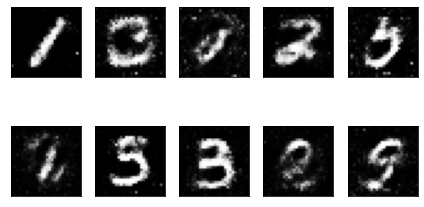

epoch = 27/100, d_loss=0.590, g_loss=1.197
epoch = 28/100, d_loss=0.602, g_loss=1.142
epoch = 29/100, d_loss=0.530, g_loss=1.267
epoch = 30/100, d_loss=0.537, g_loss=1.292
epoch = 31/100, d_loss=0.650, g_loss=1.147
1/1 [==============================] - 0s 16ms/step


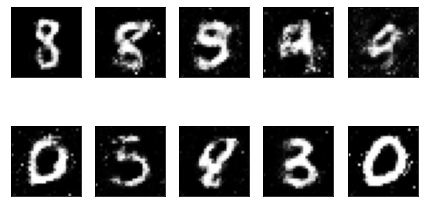

epoch = 32/100, d_loss=0.509, g_loss=1.244
epoch = 33/100, d_loss=0.647, g_loss=1.044
epoch = 34/100, d_loss=0.569, g_loss=1.179
epoch = 35/100, d_loss=0.642, g_loss=1.138
epoch = 36/100, d_loss=0.516, g_loss=1.312
1/1 [==============================] - 0s 24ms/step


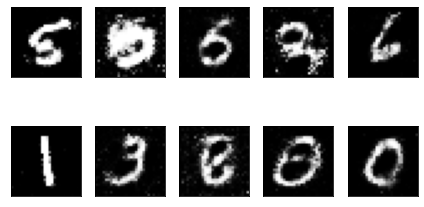

epoch = 37/100, d_loss=0.673, g_loss=0.975
epoch = 38/100, d_loss=0.494, g_loss=1.197
epoch = 39/100, d_loss=0.464, g_loss=1.171
epoch = 40/100, d_loss=0.566, g_loss=1.065
epoch = 41/100, d_loss=0.507, g_loss=1.316
1/1 [==============================] - 0s 14ms/step


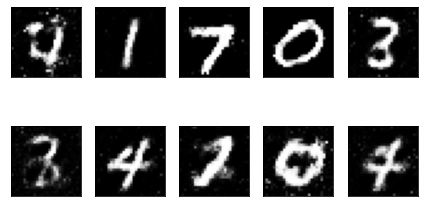

epoch = 42/100, d_loss=0.569, g_loss=1.445
epoch = 43/100, d_loss=0.501, g_loss=1.385
epoch = 44/100, d_loss=0.605, g_loss=1.088
epoch = 45/100, d_loss=0.545, g_loss=1.050
epoch = 46/100, d_loss=0.586, g_loss=1.204
1/1 [==============================] - 0s 14ms/step


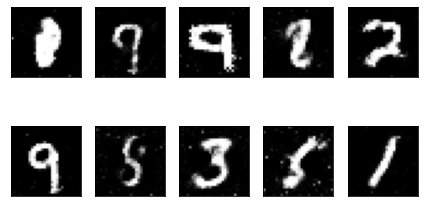

epoch = 47/100, d_loss=0.553, g_loss=1.205
epoch = 48/100, d_loss=0.505, g_loss=1.455
epoch = 49/100, d_loss=0.527, g_loss=1.098
epoch = 50/100, d_loss=0.570, g_loss=1.287
epoch = 51/100, d_loss=0.582, g_loss=1.100
1/1 [==============================] - 0s 14ms/step


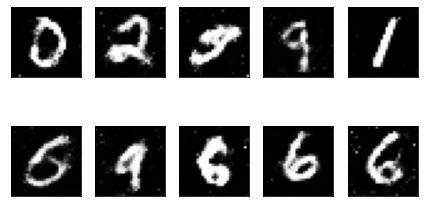

epoch = 52/100, d_loss=0.554, g_loss=1.050
epoch = 53/100, d_loss=0.542, g_loss=1.309
epoch = 54/100, d_loss=0.516, g_loss=1.271
epoch = 55/100, d_loss=0.510, g_loss=1.334
epoch = 56/100, d_loss=0.523, g_loss=1.010
1/1 [==============================] - 0s 19ms/step


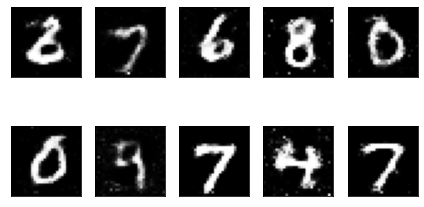

epoch = 57/100, d_loss=0.516, g_loss=1.328
epoch = 58/100, d_loss=0.643, g_loss=1.100
epoch = 59/100, d_loss=0.569, g_loss=1.145
epoch = 60/100, d_loss=0.521, g_loss=1.076
epoch = 61/100, d_loss=0.511, g_loss=1.285
1/1 [==============================] - 0s 14ms/step


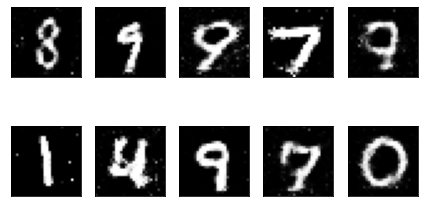

epoch = 62/100, d_loss=0.552, g_loss=1.157
epoch = 63/100, d_loss=0.505, g_loss=1.290
epoch = 64/100, d_loss=0.549, g_loss=1.317
epoch = 65/100, d_loss=0.638, g_loss=1.117
epoch = 66/100, d_loss=0.541, g_loss=1.289
1/1 [==============================] - 0s 14ms/step


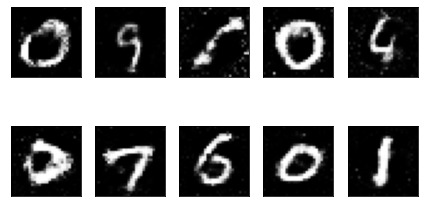

epoch = 67/100, d_loss=0.564, g_loss=1.258
epoch = 68/100, d_loss=0.608, g_loss=1.131
epoch = 69/100, d_loss=0.589, g_loss=1.062
epoch = 70/100, d_loss=0.499, g_loss=1.252
epoch = 71/100, d_loss=0.559, g_loss=1.124
1/1 [==============================] - 0s 15ms/step


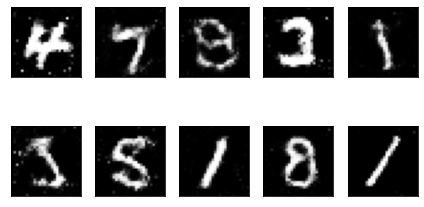

epoch = 72/100, d_loss=0.498, g_loss=1.294
epoch = 73/100, d_loss=0.541, g_loss=1.173
epoch = 74/100, d_loss=0.589, g_loss=1.194
epoch = 75/100, d_loss=0.713, g_loss=0.893
epoch = 76/100, d_loss=0.460, g_loss=1.183
1/1 [==============================] - 0s 14ms/step


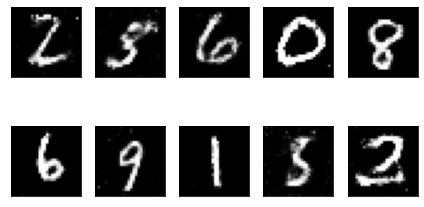

epoch = 77/100, d_loss=0.505, g_loss=1.130
epoch = 78/100, d_loss=0.569, g_loss=1.229
epoch = 79/100, d_loss=0.516, g_loss=1.198
epoch = 80/100, d_loss=0.616, g_loss=1.152
epoch = 81/100, d_loss=0.607, g_loss=1.268
1/1 [==============================] - 0s 14ms/step


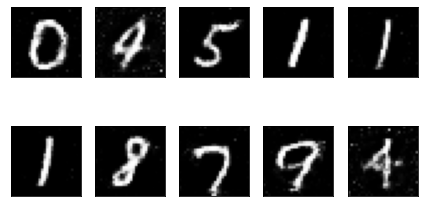

epoch = 82/100, d_loss=0.585, g_loss=1.138
epoch = 83/100, d_loss=0.490, g_loss=1.114
epoch = 84/100, d_loss=0.581, g_loss=1.074
epoch = 85/100, d_loss=0.551, g_loss=1.263
epoch = 86/100, d_loss=0.629, g_loss=1.146
1/1 [==============================] - 0s 15ms/step


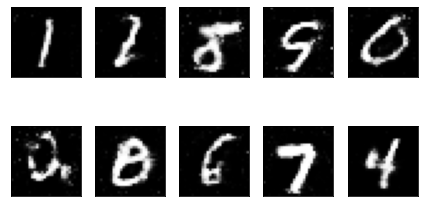

epoch = 87/100, d_loss=0.522, g_loss=1.267
epoch = 88/100, d_loss=0.474, g_loss=1.300
epoch = 89/100, d_loss=0.605, g_loss=1.074
epoch = 90/100, d_loss=0.549, g_loss=1.242
epoch = 91/100, d_loss=0.533, g_loss=1.281
1/1 [==============================] - 0s 14ms/step


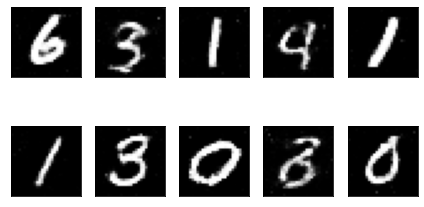

epoch = 92/100, d_loss=0.563, g_loss=1.063
epoch = 93/100, d_loss=0.533, g_loss=1.161
epoch = 94/100, d_loss=0.535, g_loss=1.509
epoch = 95/100, d_loss=0.498, g_loss=1.335
epoch = 96/100, d_loss=0.564, g_loss=1.459
1/1 [==============================] - 0s 13ms/step


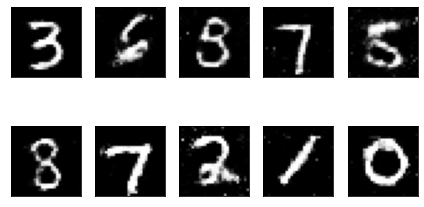

epoch = 97/100, d_loss=0.572, g_loss=1.450
epoch = 98/100, d_loss=0.519, g_loss=1.302
epoch = 99/100, d_loss=0.558, g_loss=1.341
epoch = 100/100, d_loss=0.552, g_loss=1.231


In [14]:
d_loss = []
g_loss = []

for e in range(epochs):
    for i in range(len(X_train) // batch_size):

        discriminator.trainable = True

        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, real)

        noise = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        fake_imgs = generator.predict_on_batch(noise)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake)

        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        discriminator.trainable = False
        g_loss_batch = gan.train_on_batch(noise, real)

    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print("epoch = %d/%d, d_loss=%.3f, g_loss=%.3f" % (e + 1, epochs, d_loss[-1], g_loss[-1]))

    if e % 5 == 0:
        samples = 10
        fake_imgs = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(fake_imgs[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout()
        plt.show()

### **5. 평가**

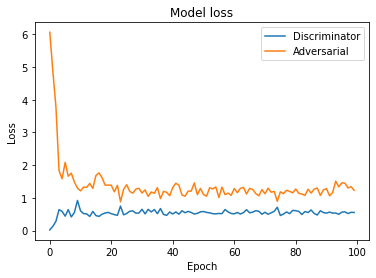

In [15]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'])
plt.show()